In [7]:
import torch
from torchvision import models, datasets, transforms
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

✅ Using device: cuda


In [8]:
test_dir = Path("C:/Users/ycode/Desktop/Diagnostic-multimodal-par-IA-via-Transfer-Learning/Medical-Image-Analysis-AI/data/part_one_data/test")

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"📁 Classes: {test_dataset.classes}")
print(f"🖼️ Nombre d’images de test : {len(test_dataset)}")


📁 Classes: ['Benign', 'Pre-B', 'Pro-B', 'early Pre-B']
🖼️ Nombre d’images de test : 490


In [9]:
from torchvision.models import GoogLeNet
from torch.serialization import add_safe_globals

# Allow GoogLeNet to be safely loaded
add_safe_globals([GoogLeNet])

best_model_path = "../US3_training_evaluation_pytorch/models/best_model.pth"

# Load the full model directly
model = torch.load(best_model_path, map_location=device, weights_only=False)
model.eval()

print("✅ Model loaded and ready for evaluation!")


✅ Model loaded and ready for evaluation!


In [10]:
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = np.mean(np.array(all_preds) == np.array(all_labels)) * 100
print(f"\n✅ Test Accuracy: {accuracy:.2f}%")



✅ Test Accuracy: 99.80%


In [11]:
target_names = test_dataset.classes
print("\n📊 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=target_names))



📊 Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        78
       Pre-B       1.00      1.00      1.00       144
       Pro-B       1.00      0.99      1.00       120
 early Pre-B       0.99      1.00      1.00       148

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490



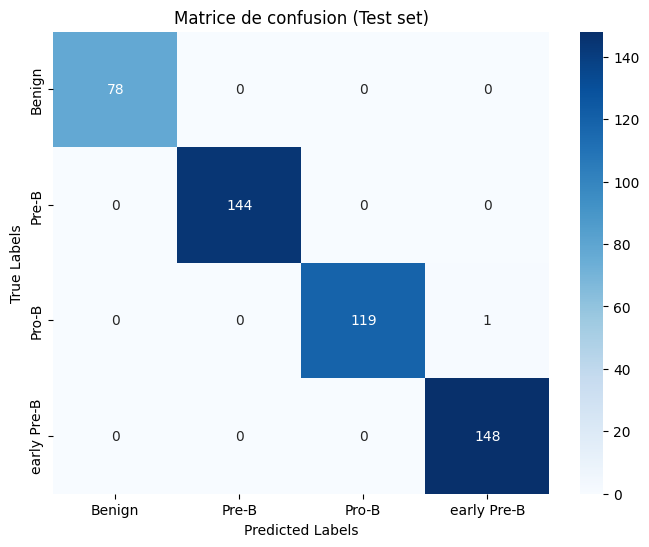

In [12]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matrice de confusion (Test set)")
plt.show()

# Testing the model :

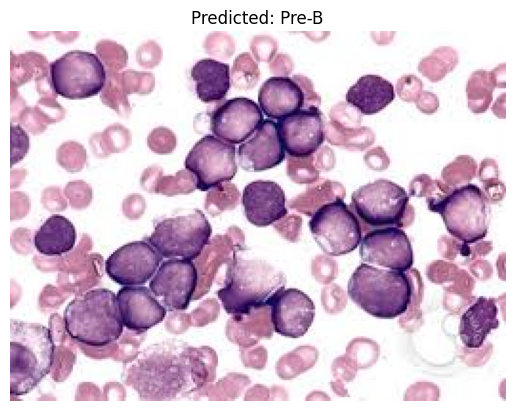

Pre-B


In [ ]:
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Define same transform used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load and preprocess real image
image_path = "C:/Users/ycode/Desktop/pre-b2.jpg"
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# Predict
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    probs = torch.softmax(output, dim=1)
    pred_idx = torch.argmax(probs, dim=1).item()

# Show prediction
class_names = test_dataset.classes
plt.imshow(image)
plt.title(f"Predicted: {class_names[pred_idx]}")
plt.axis("off")
plt.show()


print(class_names[pred_idx])